# ESPECIALIZAÇÃO EM ANÁLISE E ENGENHARIA DE DADOS - Cesar School
## Aluno: Artur Maia Wanderley
# Disciplina: Introdução à Ciência de dados
# Projeto: Explorando os dados de acidentes de trânsito no município de Recife em 2018

## Introdução
O objetivo deste projeto é explorar os dados referentes aos acidentes de trânsito, com e sem vítimas, no município de Recife no ano de 2018. 

Este projeto está dividido em 4 partes:

- Obtenção dos dados
- Pré-processamento dos dados
  - Definição de tipos
  - Tratamento de dados ausentes
  - Normalização e discretização
  - Detecção de outliers (univariado e bivariado)
- Estatística descritiva e visualização dos dados
    - Pergunta 1: Em quais horários ocorrem mais acidentes de trânsito na cidade de Recife?
    - Pergunta 2: Em quais bairros do Recife acidentes de trânsito são mais communs?
    - Pergunta 3: O número de acidentes de trânsito por bairro está correlacionado com o número de vítimas de trânsito por bairro?
    - Pergunta 4: Quais tipos de acidentes causam maior número de vítimas fatais?
    - Pergunta 5: Qual a média, a mediana e o desvio padrão do número de vítimas por tipo de acidente?
- Conclusões

In [1646]:
# Importando as bibliotecas que serão utilizadas nesse projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Obtenção dos dados
Os dados utilizados neste projeto foram obtidos no [Portal de Dados Abertos da Cidade do Recife](http://dados.recife.pe.gov.br/) e podem ser acessados [aqui](http://dados.recife.pe.gov.br/dataset/acidentes-de-transito-com-e-sem-vitimas/resource/2485590a-3b35-4ad0-b955-8dfc36b61021).

In [1647]:
# Importando os dados
acidentes_rec=pd.read_csv("https://raw.githubusercontent.com/Artur-Wanderley/introducao-analise-de-dados/master/acidentes2018.csv",sep=";")
acidentes_rec.head()

,tipo,situacao,data,hora,bairro,endereco,numero,complemento,natureza,descricao,...,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,ATROPELAMENTO,FINALIZADA,2018-01-01,0:01:00,SÃO JOSÉ,AV ENGENHEIRO JOSE ESTELITA,NaN,EM FRENTE AO CAIS JOSE ESTELITA,ATROPELAMENTO,AUTO E PEDESTRE C/V,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN
1,COLISÃO,CANCELADA,2018-01-01,2:45:00,CORDEIRO,AV CAXANGA,NaN,"PROX DO GALETOS, EM FRENTE AO PARQUE DE EXPOSI...",COLISÃO,COLISÃO ENTRE AUTO E MO S/V,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,COLISÃO,CANCELADA,2018-01-01,3:33:00,BOA VIAGEM,AV CONSELHEIRO AGUIAR,NaN,"PROX DO BANCO DO BRASIL, PROX DO BANCO ITAÚ",COLISÃO,COLISÃO ENTRE UM AUTO(TAXI) E VIATURA DA AERON...,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,NaN
3,COLISÃO,FINALIZADA,2018-01-01,7:13:00,BAIRRO DO RECIFE,AV ALFREDO LISBOA,NaN,PROX AO POSTO DE GASOLINA BR AO LADO DO ...,COLISÃO,COLISÃO SEM VITIMAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,COLISÃO,FINALIZADA,2018-01-01,7:50:00,CASA AMARELA,RUA PADRE LEMOS,767,EM FRENTE AO POSTO PETROBRAS,COLISÃO,TAXI E AUTO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


# 2 Pré-processamento dos dados
## 2.1 Definição dos tipos de dados
Agora, vamos visualizar os tipos de dados em `acidentes_rec`.

In [1648]:
acidentes_rec.dtypes

tipo              object
situacao          object
data              object
hora              object
bairro            object
endereco          object
numero            object
complemento       object
natureza          object
descricao         object
auto              object
moto             float64
ciclom           float64
ciclista         float64
pedestre          object
onibus           float64
caminhao         float64
viatura           object
outros            object
vitimas           object
vitimasfatais    float64
dtype: object

Existem dois tipos de dados em `acidentes_rec`, `object` e `float64`. 

Como vemos acima, as colunas `tipo` e `situacao` podem ser transformadas em variáveis categóricas. Vamos olhar quais valores essas colunas trazem.

Já as colunas `data` e `hora` podem ser concatenadas e convertidas para o tipo `datetime`.

As colunas `bairro`, `endereco`, `numero`, `complemento`, `natureza` e `descricao` podem ser mantidos como tipo `object` já que elas são strings que contêm informações acerca do local e das circunstâncias em que as colisões ocorreram. 

As demais colunas informam o número de veículos de diferentes tipos, bem como de pedestres e vítimas envolvidos nas colisões. Portanto, transformaremos os valores de todas essas colunas em valores numéricos (`int64`).

Começaremos transformandos as colunas `tipo`e `situação` em variáveis categóricas.

## Convertendo as colunas `tipo` e `situacao` em variáveis categóricas

In [1649]:
# Observando os valores únicos na coluna tipo
unicos_tipo=acidentes_rec.tipo.value_counts()
print(unicos_tipo)
print("\nNúmero de valores únicos: ",unicos_tipo.shape[0])

COLISÃO                      8604
ABALROAMENTO LONGITUDINAL     704
COLISÃO TRASEIRA              524
ABALROAMENTO TRANSVERSAL      381
ATROPELAMENTO                 213
CHOQUE                        196
ENGAVETAMENTO                 172
COLISÃO COM CICLISTA          163
CHOQUE VEÍCULO PARADO          78
ACID. DE PERCURSO              60
COLISÃO FRONTAL                49
CHOQUE OBJETO FIXO             38
CAPOTAMENTO                    22
QUEDA DE ÁRVORE                21
ATROPELAMENTO ANIMAL            7
TOMBAMENTO                      7
0                               1
Name: tipo, dtype: int64

Número de valores únicos:  17


Como podemos ver, existem 17 valores únicos na coluna tipo que se referem a categorias distintas de colisão. Note que existe uma categoria cujo valor é `0`. Mais adiante investigaremos se esse valor é um erro que devemos remover do nosso dataset. 

Por enquanto, vamos transformar a coluna `tipo` em uma variável categórica com 17 categorias distintas de colisão. 

In [1650]:
# Convertendo a coluna tipo em uma variável categórica
acidentes_rec.tipo=acidentes_rec.tipo.astype("category")

Agora vamos ver os valores únicos da coluna `situacao`.

In [1651]:
# Observando os valores únicos da coluna situação
unicos_situacao=acidentes_rec.situacao.value_counts()
print(unicos_situacao)
print("\nNúmero de valores únicos: ",unicos_situacao.shape[0])

FINALIZADA         9537
CANCELADA          1693
PENDENTE             46
EQUIPE NO LOCAL       5
Name: situacao, dtype: int64

Número de valores únicos:  4


Como podemos ver, a coluna `situacao` possui valores únicos que indicam quatro  status de atendimento das ocorrências pelas autoridades.

Vamos transformar a coluna `situacao` em uma variável categórica.

In [1652]:
# Convertendo a coluna situacao em variável categórica
acidentes_rec.situacao=acidentes_rec.situacao.astype("category")

## Concatenando e convertendo as colunas `data` e `hora` em tipo `datetime`

In [1653]:
# Concatenando e convertendo as colunas data e hora em datetime
data_hora=pd.to_datetime(acidentes_rec.data +" "+ acidentes_rec.hora,errors="coerce")
acidentes_rec=pd.concat([data_hora,acidentes_rec],axis=1)
acidentes_rec.rename(columns={0:"data_hora"},inplace=True)
acidentes_rec.drop(columns=["data","hora"],inplace=True)
acidentes_rec.head()

,data_hora,tipo,situacao,bairro,endereco,numero,complemento,natureza,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2018-01-01 00:01:00,ATROPELAMENTO,FINALIZADA,SÃO JOSÉ,AV ENGENHEIRO JOSE ESTELITA,NaN,EM FRENTE AO CAIS JOSE ESTELITA,ATROPELAMENTO,AUTO E PEDESTRE C/V,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN
1,2018-01-01 02:45:00,COLISÃO,CANCELADA,CORDEIRO,AV CAXANGA,NaN,"PROX DO GALETOS, EM FRENTE AO PARQUE DE EXPOSI...",COLISÃO,COLISÃO ENTRE AUTO E MO S/V,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2018-01-01 03:33:00,COLISÃO,CANCELADA,BOA VIAGEM,AV CONSELHEIRO AGUIAR,NaN,"PROX DO BANCO DO BRASIL, PROX DO BANCO ITAÚ",COLISÃO,COLISÃO ENTRE UM AUTO(TAXI) E VIATURA DA AERON...,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,NaN
3,2018-01-01 07:13:00,COLISÃO,FINALIZADA,BAIRRO DO RECIFE,AV ALFREDO LISBOA,NaN,PROX AO POSTO DE GASOLINA BR AO LADO DO ...,COLISÃO,COLISÃO SEM VITIMAS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2018-01-01 07:50:00,COLISÃO,FINALIZADA,CASA AMARELA,RUA PADRE LEMOS,767,EM FRENTE AO POSTO PETROBRAS,COLISÃO,TAXI E AUTO,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## Convertendo os valores das demais colunas em valores numéricos

Veja acima que as colunas `auto`,	`moto`,	`ciclom`,	`ciclista`,	`pedestre`,	`onibus`,	`caminhao`,	`viatura`,	`outros`possuem `NaN`, mas isso não significa que sejam dados ausentes. Trataremos desses `NaN` mais adiante.

Por hora, vamos apenas converter os valores dessas colunas que não são `NaN` em valores numéricos.

In [1654]:
# Criando uma lista com os rótulos das colunas para facilitar as estapas seguintes
cols=acidentes_rec.loc[:,"auto":].columns.tolist()

# Convertendo os valores das colunas em valores numéricos
for i in cols:
    acidentes_rec[i]=pd.to_numeric(acidentes_rec[i],errors="coerce")
acidentes_rec.head()

,data_hora,tipo,situacao,bairro,endereco,numero,complemento,natureza,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2018-01-01 00:01:00,ATROPELAMENTO,FINALIZADA,SÃO JOSÉ,AV ENGENHEIRO JOSE ESTELITA,NaN,EM FRENTE AO CAIS JOSE ESTELITA,ATROPELAMENTO,AUTO E PEDESTRE C/V,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
1,2018-01-01 02:45:00,COLISÃO,CANCELADA,CORDEIRO,AV CAXANGA,NaN,"PROX DO GALETOS, EM FRENTE AO PARQUE DE EXPOSI...",COLISÃO,COLISÃO ENTRE AUTO E MO S/V,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2018-01-01 03:33:00,COLISÃO,CANCELADA,BOA VIAGEM,AV CONSELHEIRO AGUIAR,NaN,"PROX DO BANCO DO BRASIL, PROX DO BANCO ITAÚ",COLISÃO,COLISÃO ENTRE UM AUTO(TAXI) E VIATURA DA AERON...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN
3,2018-01-01 07:13:00,COLISÃO,FINALIZADA,BAIRRO DO RECIFE,AV ALFREDO LISBOA,NaN,PROX AO POSTO DE GASOLINA BR AO LADO DO ...,COLISÃO,COLISÃO SEM VITIMAS,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2018-01-01 07:50:00,COLISÃO,FINALIZADA,CASA AMARELA,RUA PADRE LEMOS,767,EM FRENTE AO POSTO PETROBRAS,COLISÃO,TAXI E AUTO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


## Conferindo os tipos de dados após as conversões aplicadas às colunas

In [1655]:
 acidentes_rec.dtypes

data_hora        datetime64[ns]
tipo                   category
situacao               category
bairro                   object
endereco                 object
numero                   object
complemento              object
natureza                 object
descricao                object
auto                    float64
moto                    float64
ciclom                  float64
ciclista                float64
pedestre                float64
onibus                  float64
caminhao                float64
viatura                 float64
outros                  float64
vitimas                 float64
vitimasfatais           float64
dtype: object

Como podemos ver, todas as colunas do dataset foram transformados para os tipos desejados.
Agora vamos analisar os dados ausentes em `acidentes_rec`.

## 2.2 Tratamento dos dados ausentes
Agora vamos visualizar o volume e a distribuição dos dados ausentes ao longo das colunas do nosso dataset, utilizando a função `heatmap` do Seaborn.

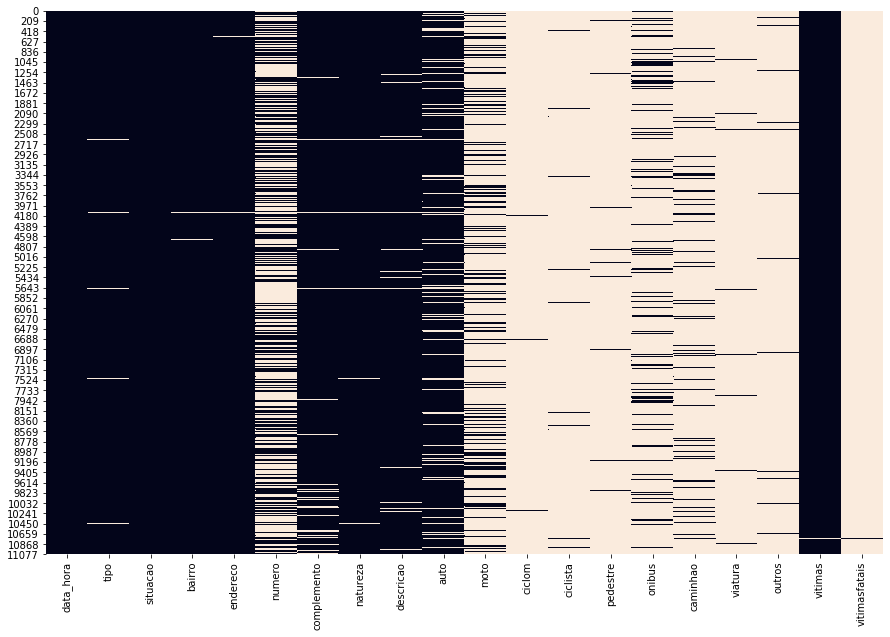

In [1656]:
# Criando um heatmap para visualizar os dados ausentes do nosso dataset
plt.figure(figsize=(15,10))
sns.heatmap(acidentes_rec.isnull(),cbar=False)
plt.show()

Como podemos ver, nosso dataset possui uma grande quantidade de dados ausentes. 
Começaremos verificando se existem linhas completamente preenchidas por dados ausentes.

In [1657]:
# Verificando se há linhas em que todos os valores são NaN
acidentes_rec[acidentes_rec.isna().all(1)]

,data_hora,tipo,situacao,bairro,endereco,numero,complemento,natureza,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais


Como podemos ver, nenhuma linha do nosso dataset está completamente preenchida por `NaN`.

Agora, vamos analisar as colunas que possuem maior quantidade de dados ausentes.

Veja no heatmap acima que as colunas `auto`, `moto`, `ciclom`,	`ciclista`,	`pedestre`,	`onibus`, `caminhao`, `viatura`, `outros` são dominadas por `NaN`, mas isso não significa que sejam missing data. Provavelmente, a maioria dos  `NaN` nessas colunas indicam que o tipo de veículo que intitula a coluna não esteve envolvido no acidente. 

Dessa maneira, para essas colunas, vamos substituir os `NaN` por `0`. Esse procedimento tem o risco de substituir um missing data real por um valor irreal (`0`), mas se excluirmos todas as linhas com `NaN` perderemos um volume muito grande de dados.

Note também que a coluna `vitimasfatais` é dominada por `NaN`. Isso é esperado porque a maioria dos acidentes de trânsito não resulta em acidentes fatais. Sendo assim, vamos também vamos substituir os `NaN` dessa coluna por `0`.

In [1658]:
# Substituindo os NaNs por zeros
cols=acidentes_rec.iloc[:,np.r_[9:18,-1]].columns.tolist()
acidentes_rec[cols]=acidentes_rec[cols].fillna(0)
acidentes_rec.head()

,data_hora,tipo,situacao,bairro,endereco,numero,complemento,natureza,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2018-01-01 00:01:00,ATROPELAMENTO,FINALIZADA,SÃO JOSÉ,AV ENGENHEIRO JOSE ESTELITA,NaN,EM FRENTE AO CAIS JOSE ESTELITA,ATROPELAMENTO,AUTO E PEDESTRE C/V,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2018-01-01 02:45:00,COLISÃO,CANCELADA,CORDEIRO,AV CAXANGA,NaN,"PROX DO GALETOS, EM FRENTE AO PARQUE DE EXPOSI...",COLISÃO,COLISÃO ENTRE AUTO E MO S/V,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01 03:33:00,COLISÃO,CANCELADA,BOA VIAGEM,AV CONSELHEIRO AGUIAR,NaN,"PROX DO BANCO DO BRASIL, PROX DO BANCO ITAÚ",COLISÃO,COLISÃO ENTRE UM AUTO(TAXI) E VIATURA DA AERON...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2018-01-01 07:13:00,COLISÃO,FINALIZADA,BAIRRO DO RECIFE,AV ALFREDO LISBOA,NaN,PROX AO POSTO DE GASOLINA BR AO LADO DO ...,COLISÃO,COLISÃO SEM VITIMAS,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01 07:50:00,COLISÃO,FINALIZADA,CASA AMARELA,RUA PADRE LEMOS,767,EM FRENTE AO POSTO PETROBRAS,COLISÃO,TAXI E AUTO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vamos visualizar novamente as distribuição dos dados ausentes ao longo do nosso dataset.

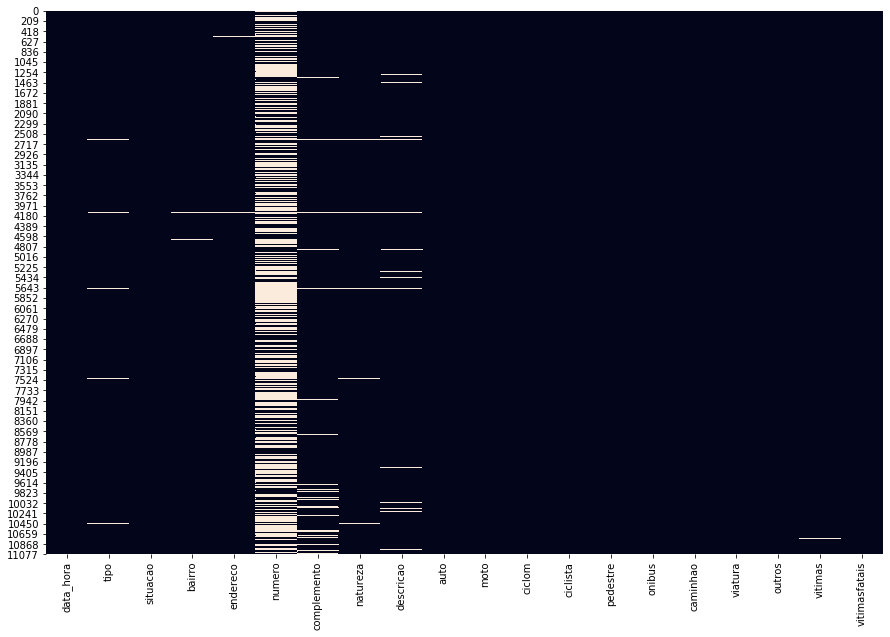

In [1659]:
# Criando um heatmap para visualizar os dados ausentes do nosso dataset
plt.figure(figsize=(15,10))
sns.heatmap(acidentes_rec.isnull(),cbar=False)
plt.show()

Agora que resolvemos os dados ausentes das colunas dominadas por eles, vamos olhar mais detalhamente para os dados ausentes das demais colunas de `acidentes_rec`.

In [1660]:
# Contando os NaNs por coluna
acidentes_rec.isna().sum()

data_hora          15
tipo               42
situacao            1
bairro             26
endereco           18
numero           6037
complemento       437
natureza           42
descricao         227
auto                0
moto                0
ciclom              0
ciclista            0
pedestre            0
onibus              0
caminhao            0
viatura             0
outros              0
vitimas            14
vitimasfatais       0
dtype: int64

Como podemos ver, ainda existem colunas com grandes quantidades de `NaN`. 

A coluna `data_hora` possui 15 linhas com dados ausentes. Mais adiante, vamos investigar quais horários possuem maior frequência de acidentes. Portanto, ocorrências de acidentes cujos registros de data e hora foram perdidos não servem para as análises que conduzieremos mais adiante.

Vamos exlcuir do nosso dataset as linhas com `NaN` na coluna `data_hora`.

In [1661]:
# Excluindo as linhas do dataset que não possuem informação de data e hora
linhas_excluir=acidentes_rec.data_hora.dropna(axis=0).index
acidentes_rec=acidentes_rec.iloc[linhas_excluir,:]
acidentes_rec.isna().sum()

data_hora           0
tipo               41
situacao            1
bairro             26
endereco           18
numero           6028
complemento       436
natureza           41
descricao         226
auto                0
moto                0
ciclom              0
ciclista            0
pedestre            0
onibus              0
caminhao            0
viatura             0
outros              0
vitimas            14
vitimasfatais       0
dtype: int64

### Imputando os dados da coluna tipo com a moda
Agora vamos analisar a coluna `tipo`. Note acima que existem 41 `NaN` nesta coluna.

Vamos subsituir os dados ausentes da coluna `tipo` com a sua moda, i.e., com o seu valor mais frequente.

Note que tomar essa decisão para tratar dos dados ausentes de uma coluna é apenas uma possibilidade. Outra possibilidade seria simplestmente eliminar as linhas do dataset para as quais houvesse dados ausentes nessa coluna.

Entretanto, para fins de aprendizado, imputaremos os dados ausentes da coluna `tipo` com sua moda.

In [1662]:
# Obtendo a moda da coluna tipo
acidentes_rec.tipo.mode()

0    COLISÃO
Name: tipo, dtype: category
Categories (17, object): [0, ABALROAMENTO LONGITUDINAL, ABALROAMENTO TRANSVERSAL, ACID. DE PERCURSO, ..., COLISÃO TRASEIRA, ENGAVETAMENTO, QUEDA DE ÁRVORE, TOMBAMENTO]

Como podemos ver, `COLISAO` é a moda da coluna `tipo`.

Vamos ver o quão mais frequente `COLISAO` é em relação às demais categorias nesta coluna.

In [1663]:
# Comparando a frequência da categoria COLISAO em relação às demais categorias de acidentes presentes na coluna tipo
acidentes_rec.tipo.value_counts()

COLISÃO                      8592
ABALROAMENTO LONGITUDINAL     704
COLISÃO TRASEIRA              524
ABALROAMENTO TRANSVERSAL      380
ATROPELAMENTO                 212
CHOQUE                        196
ENGAVETAMENTO                 172
COLISÃO COM CICLISTA          163
CHOQUE VEÍCULO PARADO          78
ACID. DE PERCURSO              60
COLISÃO FRONTAL                49
CHOQUE OBJETO FIXO             38
CAPOTAMENTO                    22
QUEDA DE ÁRVORE                21
TOMBAMENTO                      7
ATROPELAMENTO ANIMAL            7
0                               1
Name: tipo, dtype: int64

Como podemos ver, a categoria `COLISAO` é muito mais frequente que as demais categorias de acidentes da coluna `tipo`.

Vamos imputar as linhas da coluna `tipo` que possuem `NaN` com a moda desta coluna, que é a categoria `COLISAO`. 

In [1664]:
# Impuntando os dados ausentes na coluna tipo com a categoria COLISAO
acidentes_rec.tipo=acidentes_rec.tipo.fillna("COLISÃO")
print("Quantidade de dados ausentes na coluna tipo: ",acidentes_rec.tipo.isna().sum())

Quantidade de dados ausentes na coluna tipo:  0


Note na tabela acima de valores únicos da coluna `tipo` que existe um categoria de acidente denominada `0`. Isto é uma erro. Vamos substituir o valor dessa linha também pela moda `COLISÃO`.

In [1665]:
# Substituindo zero por COLISÃO na coluna tipo
acidentes_rec.tipo=acidentes_rec.tipo.str.replace("0","COLISÃO")
acidentes_rec.tipo.value_counts()

COLISÃO                      8634
ABALROAMENTO LONGITUDINAL     704
COLISÃO TRASEIRA              524
ABALROAMENTO TRANSVERSAL      380
ATROPELAMENTO                 212
CHOQUE                        196
ENGAVETAMENTO                 172
COLISÃO COM CICLISTA          163
CHOQUE VEÍCULO PARADO          78
ACID. DE PERCURSO              60
COLISÃO FRONTAL                49
CHOQUE OBJETO FIXO             38
CAPOTAMENTO                    22
QUEDA DE ÁRVORE                21
TOMBAMENTO                      7
ATROPELAMENTO ANIMAL            7
Name: tipo, dtype: int64

### Excluindo dados ausentes na coluna `situacao`

Note abaixo que a coluna `situacao` possui apenas um dados ausente.

In [1666]:
# Observando os dados ausentes na coluna situacao
print("Número de dados ausentes na coluna 'situação':",acidentes_rec.situacao.isna().sum())

Número de dados ausentes na coluna 'situação': 1


Como existe apenas um dado ausente neste coluna, podemos simplesmente excluir do dataset a linha em que esse dado ausente se encontra.

In [1667]:
# Excluindo a linha com dado ausente na coluna situacao
acidentes_rec=acidentes_rec.loc[acidentes_rec.situacao.dropna(axis=0).index,:]

### Tratando os dados ausentes das colunas referentes aos locais dos acidentes
Agora vamos tratar os dados ausentes das colunas que contêm informações acerca dos locais onde os acidentes ocorreram. Estas informações estão contidas nas colunas `bairro`, `endereco`, `numero` e `complemento`.

In [1668]:
print(acidentes_rec.bairro.value_counts(),"\n")
print(acidentes_rec.endereco.value_counts(),"\n")
print(acidentes_rec.numero.value_counts(),"\n")
print(acidentes_rec.complemento.value_counts())

BOA VIAGEM             1379
IMBIRIBEIRA             696
AFOGADOS                488
SANTO AMARO             482
MADALENA                462
                       ... 
BREJO DE BEBERIBE         2
CÓRREGO DO JENIPAPO       2
POÇO DA PANELA            1
PONTO DE PARADA           1
IPESEP                    1
Name: bairro, Length: 94, dtype: int64 

AV GOVERNADOR AGAMENON MAGALHAES     464
AV MARECHAL MASCARENHAS DE MORAES    455
AV RECIFE                            360
AV CAXANGA                           323
AV NORTE                             321
                                    ... 
RUA DOS ARTISTAS                       1
RUA DONA LEONOR PORTO                  1
RUA SANTA RITA                         1
RUA EDSON ALVARES                      1
RUA AUREO XAVIER                       1
Name: endereco, Length: 1350, dtype: int64 

S/N     84
100     24
500     20
50      18
150     18
        ..
39 A     1
689      1
4989     1
649      1
5312     1
Name: numero, Length: 1927, dtype:

Como veremos mais adiante, o que nos interessa saber quanto à localização dos acidentes são os bairros e as vias em que os acidentes ocorreram. Estas informações estão nas colunas `bairro` e `endereco`, respectivamente. Portanto vamos excluir as colunas `numero` e `complemento` do nosso dataset.

In [1669]:
# Excluindo as colunas numero e complemento do dataset
acidentes_rec.drop(columns=["numero","complemento"],inplace=True)
acidentes_rec.columns.tolist()

['data_hora',
 'tipo',
 'situacao',
 'bairro',
 'endereco',
 'natureza',
 'descricao',
 'auto',
 'moto',
 'ciclom',
 'ciclista',
 'pedestre',
 'onibus',
 'caminhao',
 'viatura',
 'outros',
 'vitimas',
 'vitimasfatais']

Agora olhemos para a quantidade de dados ausentes nas colunas `bairro` e `endereco`.

In [1670]:
print("Quantidade de dados ausentes na coluna 'bairro': ",acidentes_rec.bairro.isna().sum())
print("Quantidade de dados ausentes na coluna 'endereco': ",acidentes_rec.endereco.isna().sum())

Quantidade de dados ausentes na coluna 'bairro':  26
Quantidade de dados ausentes na coluna 'endereco':  18


Vamos exlcuir do nosso dataset todas as linhas que possuem dados ausentes nas colunas `bairro` ou `endereco`. 

Note que essa decisão é arbitrária e que poderíamos, por exemplo, optar por imputar os dados ausentes dessas colunas com suas respectivas modas, assim como fizemos para a coluna `tipo`.

In [1671]:
# Removendo as linhas com dados ausentes nas colunas bairro ou endereco
acidentes_rec=acidentes_rec.loc[acidentes_rec.bairro.dropna(axis=0).index,:]
acidentes_rec=acidentes_rec.loc[acidentes_rec.endereco.dropna(axis=0).index,:]
acidentes_rec.isna().sum()

data_hora          0
tipo               0
situacao           0
bairro             0
endereco           0
natureza          38
descricao        220
auto               0
moto               0
ciclom             0
ciclista           0
pedestre           0
onibus             0
caminhao           0
viatura            0
outros             0
vitimas           14
vitimasfatais      0
dtype: int64

### Excluindo coluna duplicada

Observemos as colunas `tipo` e `natureza`.

In [1672]:
print("Valores únicos da coluna 'tipo'\n",acidentes_rec.tipo.value_counts(), "\n")
print("Valores únicos da coluna 'natureza'\n",acidentes_rec.natureza.value_counts())      

Valores únicos da coluna 'tipo'
 COLISÃO                      8614
ABALROAMENTO LONGITUDINAL     699
COLISÃO TRASEIRA              515
ABALROAMENTO TRANSVERSAL      377
ATROPELAMENTO                 212
CHOQUE                        196
ENGAVETAMENTO                 172
COLISÃO COM CICLISTA          163
CHOQUE VEÍCULO PARADO          77
ACID. DE PERCURSO              57
COLISÃO FRONTAL                49
CHOQUE OBJETO FIXO             38
CAPOTAMENTO                    22
QUEDA DE ÁRVORE                21
ATROPELAMENTO ANIMAL            7
TOMBAMENTO                      6
Name: tipo, dtype: int64 

Valores únicos da coluna 'natureza'
 COLISÃO                      8575
ABALROAMENTO LONGITUDINAL     699
COLISÃO TRASEIRA              515
ABALROAMENTO TRANSVERSAL      377
ATROPELAMENTO                 212
CHOQUE                        196
ENGAVETAMENTO                 172
COLISÃO COM CICLISTA          163
CHOQUE VEÍCULO PARADO          77
ACID. DE PERCURSO              57
COLISÃO FRONTAL    

Note que os valores únicos das colunas `tipo` e `natureza` são os mesmos. Lembre que já tratamos a coluna `tipo`, substuindo seus dados ausentes e o valor `0` pela moda `COLISÃO`. Por isso, a frequência de `COLISÃO` é diferente entre estas colunas.

Já que as colunas `tipo` e `natureza` são idênticas e por já termos tratado os dados ausentes da coluna `tipo`, vamos excluir a coluna `natureza`.

In [1673]:
# Excluindo a coluna natureza
acidentes_rec=acidentes_rec.drop(columns="natureza")
acidentes_rec.columns.tolist()

['data_hora',
 'tipo',
 'situacao',
 'bairro',
 'endereco',
 'descricao',
 'auto',
 'moto',
 'ciclom',
 'ciclista',
 'pedestre',
 'onibus',
 'caminhao',
 'viatura',
 'outros',
 'vitimas',
 'vitimasfatais']

### Cruzando informações das colunas `descricao` e `vitimasfatais` para imputar os dados ausentes da coluna `vitimas` 
Note abaixo que apenas as colunas `descricao` e `vitimas` ainda possuem dados ausentes.

In [1674]:
acidentes_rec.isna().sum()

data_hora          0
tipo               0
situacao           0
bairro             0
endereco           0
descricao        220
auto               0
moto               0
ciclom             0
ciclista           0
pedestre           0
onibus             0
caminhao           0
viatura            0
outros             0
vitimas           14
vitimasfatais      0
dtype: int64

Vamos analisar primeiro apenas a coluna decisão.

In [1675]:
print("Valores únicos da coluna 'descricao':\n\n",acidentes_rec.descricao.value_counts(),"\n")
print("Número de valores únicos da coluna 'descricao':",acidentes_rec.descricao.value_counts().shape[0])

Valores únicos da coluna 'descricao':

 COLISÃO SEM VÍTIMA                                 895
DOIS AUTOS                                         649
COLISÃO SEM VITIMAS                                597
SEM VITIMAS                                        538
SEM VÍTIMAS                                        359
                                                  ... 
ENTRE ÕNIBUS E VAN ESCOLAR. S/V                      1
ONIBUS E DUAS MOTOS C/V                              1
COLISAO ENTRE TRASPORTE COMPLEMENTAR E AUTO S/V      1
VEÍCULO CHOCOU-SE CONTRA O MURO DO PORTO             1
AUTO SE CHOCOU CONTRA O MURO DE UM PRÉDIO. C/V       1
Name: descricao, Length: 3245, dtype: int64 

Número de valores únicos da coluna 'descricao': 3245


Note acima que a coluna `descricao` traz detalhes dos acidentes de trânsitos registrados em Recife durante o ano de 2018.

Ao todo, esta coluna possui 220 dados ausentes e 3245 valores únicos. O grande número de valores únicos nesta coluna a torna extremante complexa de ser analisada. Portanto, uma vez que que o foco desta disciplina não é o processamento de dados não estruturados, vamos excluir esta coluna.

Entretanto, antes de excluir a coluna `descricao`, vamos utilizá-la, juntamente com a coluna `vitimasfatais`, para imputar dados ausentes na coluna `vitimas`.

Note que a coluna `descricao` frequentemente informa se houve vítimas nos acidentes. Além disso, a coluna `vitimasfatais` informa se houve vítimas fatais nos acidentes. Portanto, podemos utilizar estas duas colunas para imputar dados ausentes na coluna `descricao`.

In [1676]:
# Utilizando as colunas descricao e vitimasfatais para imputar dados ausentes na coluna vitimas
acidentes_rec.reset_index(inplace=True,drop=True)
acidentes_rec[acidentes_rec["vitimas"].isna()][["descricao","vitimas","vitimasfatais"]]

,descricao,vitimas,vitimasfatais
303,MOTOCICLISTA BATEU NA MURETA E CAIU SOB VIADUTO,NaN,1.0
1882,COLISÃO SEM VÍTIMA,NaN,0.0
1939,COLISÃO ENTRE CAMINHÃO E MOTO C/V,NaN,1.0
1968,ATROPELAMENTO ENTRE ONIBUS E PEDESTRE,NaN,1.0
3356,ATROPELAMENTO ÔNIBUS E PEDESTRE,NaN,1.0
4656,ENTRE ÔNIBUS E PEDESTRE. C/VF,NaN,1.0
5681,"SEGUNDO As INFORMAÇÕES DO SD, O VEÍCULO EM QUE...",NaN,1.0
6128,CAMINHÃO E MOTO,NaN,1.0
6580,FNJ3382 CHEVROLET SPIN / KMW9617 FIAT UNO,NaN,0.0
7593,NaN,NaN,2.0


In [1677]:
# Vendo a descrição completa dos acidentes registrados nos índices 5681, 6580 e 10604
print(acidentes_rec.iloc[5681]["descricao"],"\n")
print(acidentes_rec.iloc[6580]["descricao"],"\n")
print(acidentes_rec.iloc[10604]["descricao"],"\n")

SEGUNDO As INFORMAÇÕES DO SD, O VEÍCULO EM QUESTÃO PERDEU O CONTROLE E SE CHOCOU CONTRA UMA MURETA POR CIMA DO VIADUTO, CAUSANDO O ÓBITO DO CONDUTOR. 

FNJ3382 CHEVROLET SPIN /  KMW9617 FIAT UNO 

O NÚMERO CITADO FICA NO LADO OPOSTO AO ATROPELAMENTO 



Note acima que cruzando informações das colunas `descricao` e `vitimasfatais` podemos imputar todos os dados ausentes da coluna `vitimas` simplesmente substituindo-os pelos valores presentes na coluna `vitimasfatais`.

In [1678]:
# Imputando os dados ausentes na coluna vitmas por valores da coluna vitimas fatais
acidentes_rec.vitimas.fillna(acidentes_rec.vitimasfatais,inplace=True)

Agora que utilizamos as informações da coluna `descricao`, podemos excluí-la, já que ela traz dados não estruturados, os quais estão além da escopo desta disciplina.

In [1679]:
# Excluindo a coluna descricao
acidentes_rec.drop(columns="descricao",inplace=True)
acidentes_rec.isna().sum()

data_hora        0
tipo             0
situacao         0
bairro           0
endereco         0
auto             0
moto             0
ciclom           0
ciclista         0
pedestre         0
onibus           0
caminhao         0
viatura          0
outros           0
vitimas          0
vitimasfatais    0
dtype: int64

Como podemos ver acima, não existem mais dados ausentes no nosso dataset.

## 2.3 Normalização dos dados

Para fins de aprendizado, vamos criar uma nova coluna no nosso dataset, chamada de `porcetagem_vitimas_fatais`.

Esta coluna informará a porcentagem das vítimas envolvidas nos acidentes que foram a óbito. 

Note que os valores na coluna `porcetagem_vitimas_fatais` irão variar de 0 a 100%, enquanto os valores das colunas `vitimas` e `vitimasfatais` variam de 0 a 7 e 0 a 2, respectivamente.

Portanto, utilizaremos as diferenças nos intervalos dessas três colunas para justificar a necessidade de normalização dos seus dados.

Uma vez que a coluna `porcetagem_vitimas_fatais` vai ser resultado da divisão da coluna `vitimasfatais` pela coluna `vitimas` multiplicado por 100, precisamos excluir do nosso dataset todos os acidentes em que não houve nenhuma vítima envolvida.

Note que esta parte do projeto existe para fins puramente de aprendizagem de duas técnicas de normalização de dados vistas em sala de aula. A natureza dos dados de `acidentes_rec` não torna indispensável a normalização de seus dados porque os mesmos possuem intervalos similares neste dataset. 

In [1680]:
# Criando a coluna porcetagem_vitimas_fatais
acidentes_com_vitimas=acidentes_rec[acidentes_rec.vitimas>0]
porcetagem_vitimas_fatais=(acidentes_com_vitimas.vitimasfatais/acidentes_com_vitimas.vitimas)*100
acidentes_com_vitimas=pd.concat([acidentes_com_vitimas,porcetagem_vitimas_fatais],axis=1)
acidentes_com_vitimas.rename(columns={0:"porcetagem_vitimas_fatais"},inplace=True)
acidentes_com_vitimas.head()

,data_hora,tipo,situacao,bairro,endereco,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,porcetagem_vitimas_fatais
0,2018-01-01 00:01:00,ATROPELAMENTO,FINALIZADA,SÃO JOSÉ,AV ENGENHEIRO JOSE ESTELITA,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,2018-01-02 16:11:00,COLISÃO,FINALIZADA,BAIRRO DO RECIFE,AV MILITAR,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19,2018-01-02 16:32:00,CHOQUE,FINALIZADA,ARRUDA,RUA PROFESSOR JERONIMO GUEIROS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21,2018-01-02 17:11:00,COLISÃO,FINALIZADA,APIPUCOS,RUA DE APIPUCOS,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36,2018-01-03 07:06:00,COLISÃO,FINALIZADA,DERBY,RUA HENRIQUE DIAS,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [1681]:
# Verificando os valores únicos da nova coluna porcetagem_vitimas_fatais
acidentes_com_vitimas.porcetagem_vitimas_fatais.value_counts()

0.000000      2003
100.000000      20
50.000000        2
16.666667        1
14.285714        1
Name: porcetagem_vitimas_fatais, dtype: int64

### Normalização para intervalo entre 0 e 1

Primeiro normalizaremos os dados da coluna `porcetagem_vitimas_fatais` manualmente, depois, utilizando a função `MinMaxScaler()`.

In [1682]:
# Normalização manual
porcentagem_vf_std=(acidentes_com_vitimas.porcetagem_vitimas_fatais-
                    acidentes_com_vitimas.porcetagem_vitimas_fatais.min(axis=0))/(acidentes_com_vitimas.porcetagem_vitimas_fatais.max(axis=0)-
                                                                                  acidentes_com_vitimas.porcetagem_vitimas_fatais.min(axis=0))
porcentagem_vf_norm=porcentagem_vf_std*(porcentagem_vf_std.max(axis=0)-porcentagem_vf_std.min(axis=0))+porcentagem_vf_std.min(axis=0)
porcentagem_vf_norm.describe()

count    2027.000000
mean        0.010513
std         0.100158
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: porcetagem_vitimas_fatais, dtype: float64

In [1683]:
# Normalizando os dados das colunas numéricas com a função MinMaxScaler()
scaler = MinMaxScaler()
# Primeiro criaremos uma lista com os rótulos das colunas que serão normalizadas
cols=['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais',
       'porcetagem_vitimas_fatais']

# Aplicando a função MinMaxScaler() para normalizar as colunas numéricas do dataset
cols_norm=scaler.fit_transform(acidentes_com_vitimas[cols])
cols_norm=pd.DataFrame(cols_norm)

# Renomeando as colunas normalizadas
cols_inicio=list(range(12))
cols_novo=[]
dic_renom_cols={}
for i in cols:
    cols_novo.append(i+"{}".format("_norm"))
cols_novo

for i,g in zip(cols_inicio,cols_novo):
    dic_renom_cols[i]=g

cols_norm=cols_norm.rename(columns=dic_renom_cols)
    
# Aplicando função describre() às colunas normalizadas
cols_norm.describe()

,auto_norm,moto_norm,ciclom_norm,ciclista_norm,pedestre_norm,onibus_norm,caminhao_norm,viatura_norm,outros_norm,vitimas_norm,vitimasfatais_norm,porcetagem_vitimas_fatais_norm
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,0.214480,0.256866,0.015294,0.032067,0.049581,0.045141,0.017760,0.001603,0.006907,0.027791,0.006167,0.010513
std,0.145799,0.178707,0.122748,0.123529,0.153548,0.145887,0.096485,0.025096,0.082840,0.077991,0.057390,0.100158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note acima que com a normalização o intervalo dos valores de todas as colunas ficou entre 0 e 1.

Além disso, compare as estatísticas descritivas da coluna `porcetagem_vitimas_fatais_norm` após a normalização manual e a realizada pela função `MinMaxScaler()`. Note que os valores são iguais, o que, portanto, revela o algoritmo por trás da função `MinMaxScaler()`.

### Normalização para média = 0 e desvio padrão igual = 1

Agora, aplicaremos a segunda técnica de normalização, a qual torna a média igual=0 e desvio padrão=1 para qualquer variável.

Assim como fizemos para a primeira técnica de normalização, aplicaremos primeiro a normalização manualmente à coluna `porcetagem_vitimas_fatais`. Em seguida, aplicaremos a função `StandardScaler()` para normalizar todas as variáveis quantitativas do nosso dataset. 

In [1684]:
# Normalização manual da coluna porcetagem_vitimas_fatais
porcentagem_vf_norm=(acidentes_com_vitimas.porcetagem_vitimas_fatais-
                                acidentes_com_vitimas.porcetagem_vitimas_fatais.mean())/acidentes_com_vitimas.porcetagem_vitimas_fatais.std()
porcentagem_vf_norm.describe()

count    2.027000e+03
mean     1.409003e-17
std      1.000000e+00
min     -1.049623e-01
25%     -1.049623e-01
50%     -1.049623e-01
75%     -1.049623e-01
max      9.879240e+00
Name: porcetagem_vitimas_fatais, dtype: float64

In [1685]:
# Normalizando os dados das colunas numéricas com a função StandardScaler()
scaler = StandardScaler()
# Primeiro criaremos uma lista com os rótulos das colunas que serão normalizadas
cols=['auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais',
       'porcetagem_vitimas_fatais']

# Aplicando a função StandardScaler() para normalizar as colunas numéricas do dataset
cols_norm=scaler.fit_transform(acidentes_com_vitimas[cols])
cols_norm=pd.DataFrame(cols_norm)

# Renomeando as colunas normalizadas
cols_inicio=list(range(12))
cols_novo=[]
dic_renom_cols={}
for i in cols:
    cols_novo.append(i+"{}".format("_norm"))
cols_novo

for i,g in zip(cols_inicio,cols_novo):
    dic_renom_cols[i]=g

cols_norm=cols_norm.rename(columns=dic_renom_cols)
    
# Aplicando função describre() às colunas normalizadas
cols_norm.describe()

,auto_norm,moto_norm,ciclom_norm,ciclista_norm,pedestre_norm,onibus_norm,caminhao_norm,viatura_norm,outros_norm,vitimas_norm,vitimasfatais_norm,porcetagem_vitimas_fatais_norm
count,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03,2.027000e+03
mean,-5.062277e-17,6.903977e-17,2.931520e-16,-1.108306e-15,-1.762554e-16,-5.166618e-16,5.652717e-16,2.612612e-17,3.801158e-16,5.636011e-16,1.400924e-16,-1.899347e-16
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-1.471424e+00,-1.437707e+00,-1.246237e-01,-2.596554e-01,-3.229792e-01,-3.094972e-01,-1.841185e-01,-6.390348e-02,-8.339541e-02,-3.564306e-01,-1.074794e-01,-1.049882e-01
25%,2.436860e-01,-1.437707e+00,-1.246237e-01,-2.596554e-01,-3.229792e-01,-3.094972e-01,-1.841185e-01,-6.390348e-02,-8.339541e-02,-3.564306e-01,-1.074794e-01,-1.049882e-01
50%,2.436860e-01,4.279987e-01,-1.246237e-01,-2.596554e-01,-3.229792e-01,-3.094972e-01,-1.841185e-01,-6.390348e-02,-8.339541e-02,-3.564306e-01,-1.074794e-01,-1.049882e-01
75%,2.436860e-01,4.279987e-01,-1.246237e-01,-2.596554e-01,-3.229792e-01,-3.094972e-01,-1.841185e-01,-6.390348e-02,-8.339541e-02,-3.564306e-01,-1.074794e-01,-1.049882e-01
max,5.389015e+00,4.159411e+00,8.024157e+00,7.837599e+00,6.191238e+00,6.546795e+00,1.018278e+01,3.979220e+01,1.199107e+01,1.246875e+01,1.732138e+01,9.881678e+00


Note que, tanto com a normalização manual, quanto com a normalização realizada pela função `StandardScaler()`,  os valores das médias de dos desvios padrões não ficaram exatamente iguais, mas muito próximos a 0 e 1, respectivamente. Portanto, podemos considerar os valores de média e desvio padrão iguais a 0 e 1, respectivamente.

## 2.4 Discretização dos dados

### Discretização 1 - classificação manual 

Faremos duas discretizações neste projeto. Abaixo está descrito como faremos a primeira discretização. 

Para trabalhar nesta discretização, voltaremos ao dataset `acidentes_rec` e criaremos uma nova coluna denominada `n_partes_envolvidas`. Esta coluna conterá o número de partes envolvidas em cada acidente ocorrido em Recife em 2018. São definidas como "partes" veículos (qualquer tipo), ciclistas ou pedestres envolvidos nos acidentes.

Nesta discretização classificaremos os acidentes como sendo de "porte pequeno", "porte intermediário" e "porte grande". O porte dos acidentes será definido em função do número de partes envolvidas. 

Acidentes de "porte pequeno" serão definidos como aqueles envolvendo até 2 partes.
Acidentes de "porte médio" serão definidos como aqueles envolvendo 3 a 5 partes.
Acidentes de "porte grande" serão definidos como aqueles envolvendo mais de 5 partes.

Entretanto, antes de realizarmos a discretização, vamos criar a coluna `n_partes_envolvidas` e plotar uma histograma para visualizar a distribuição dos seus valores.

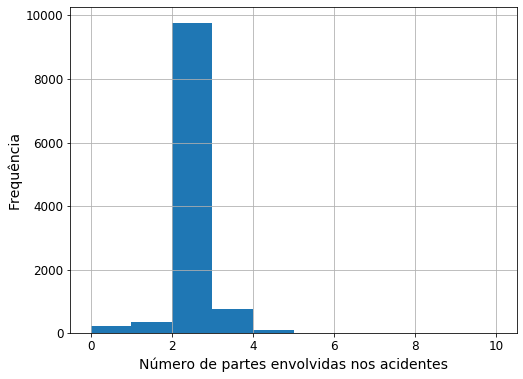

In [1686]:
# Criando a variável n_partes_envolvidas 
acidentes_rec["n_partes_envolvidas"]=acidentes_rec.loc[:,"auto":"outros"].sum(axis=1)

# Visualizando a distribuição dos valores em n_partes_envolvidas
plt.figure(figsize=(8,6))
acidentes_rec.n_partes_envolvidas.hist()
plt.xlabel("Número de partes envolvidas nos acidentes",fontsize=14)
plt.ylabel("Frequência",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Como podemos ver no histograma acima, grande parte dos acidentes envolveram 2 partes.

Agora, vamos utilizar a coluna `n_partes_envolvidas` para classificar os acidentes nas seguintes categorias "porte pequeno", "porte intermediário" e "porte grande".

In [1687]:
# Discretizando a coluna n_partes_envolvidas
def discret_n_partes(x):
    if x<=2:
        return "pequeno porte" 
    elif x > 2 and x<= 5:
        return "medio porte" 
    else:
        return "grande porte"
    
acidentes_rec["porte_acidente"]=acidentes_rec.n_partes_envolvidas.apply(discret_n_partes)
print("Proporação dos acidentes de trânsito em Recife em 2018:\n",acidentes_rec.porte_acidente.value_counts())

Proporação dos acidentes de trânsito em Recife em 2018:
 pequeno porte    10335
medio porte        884
grande porte         6
Name: porte_acidente, dtype: int64


Como podemos ver, a maioria dos acidentes que ocorreram no ano de 2018 em recife foram de pequeno porte, isto é, envolveram até dois veículos. Pouquíssimos acidentes, apenas 6, envolveram 5 ou mais veículos.

### Discretização 2 - utilizando a função `pd.cut()` 

A segunda discretização que faremos neste exercício utilizará a função `pd.cut()`. Aplicaremos esta função da coluna `auto` à coluna `outros` para criar três categorias referentes ao número de veículos (para cada tipo), ciclistas e pedestres envolvidos por acidente.

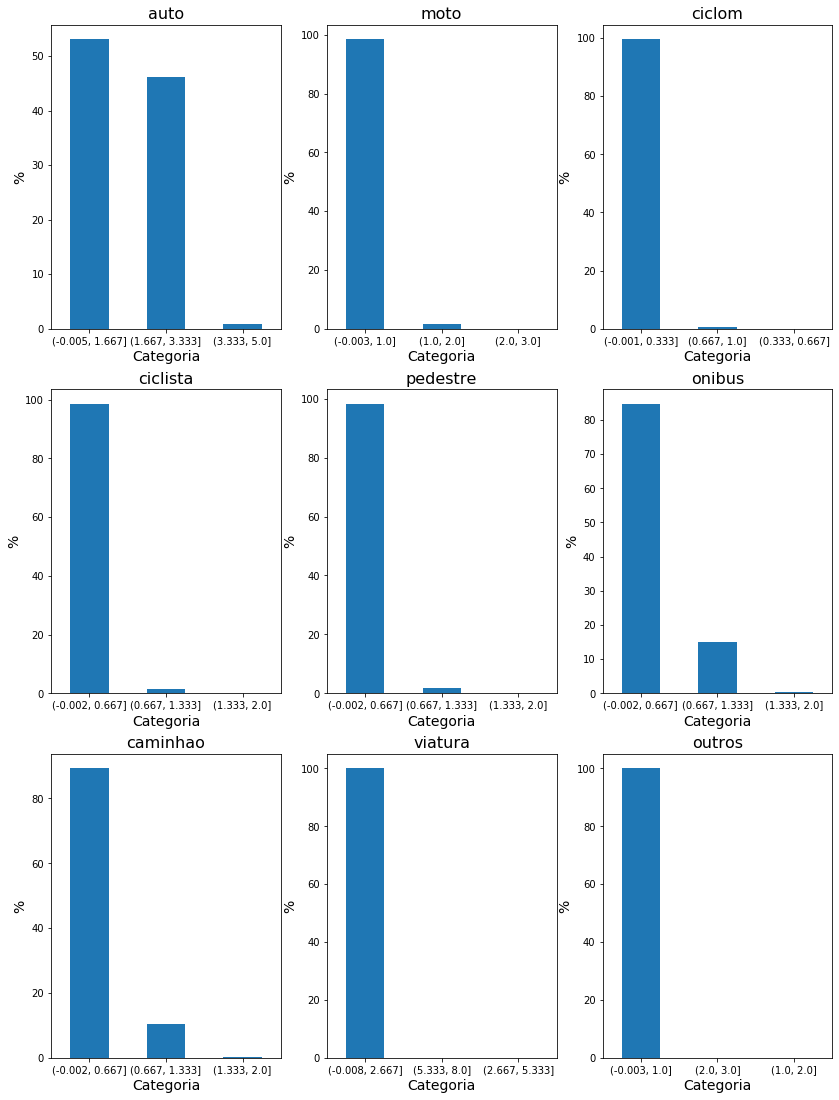

In [1688]:
# Categorizando o número de veículos (para cada tipo), ciclistas e pedestres envolvidos por acidente
cols=acidentes_rec.loc[:,"auto":"outros"].columns.tolist()
fig=plt.figure(figsize=(14,19))

for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    bins=pd.cut(acidentes_rec[cols[i]],3).value_counts(normalize=True)*100
    bins.plot.bar(rot=0)
    plt.xlabel("Categoria",fontsize=14)
    plt.ylabel("%",fontsize=14)
    ax.set_title(cols[i],fontsize=16)   

Como podemos ver, na maioria dos acidentes, apenas um representante de cada parte está envolvido. A única exceção é para `auto` (carro), onde acidentes envolvendo dois carros são quase tão frequentes quanto acidentes envolvendo apenas um carro.

## 2.5 Detecção de outliers 
### Univariado: z-score robusto

Agora, vamos verificar se existem valores discrepantes no nosso dataset. Faremos isso, utilizando análise univariada e bivariada.

Iniciaremos a detecção univariada de outliers, utilizando o z-score robusto, depois utilizaremos o método de Tukey.

Para  a detecção de outliers, adicionaremos ao nosso dataset a coluna `n_partes_envolvidas`. Esta coluna conterá o número de partes envolvidas nos acidentes. Lembrando que definimos como "partes" veículos (de qualquer tipo), ciclistas ou pedestres envolvidos nos acidentes.

Removeremos os outliers de todas as colunas quantitativas do dataset, isto é, da coluna `auto` até a coluna `n_partes_envolvidas`. 

In [1689]:
# Criando a coluna n_partes_envolvidas
acidentes_rec["n_partes_envolvidas"]=acidentes_rec.loc[:,"auto":"outros"].sum(axis=1)

In [1690]:
# Excluindo do dataset outliers, utilizando o z-score robusto 
cols=acidentes_rec.loc[:, "auto":"n_partes_envolvidas"].columns.tolist()

for i in range(12):
    mad = acidentes_rec[cols[i]].mad()
    acidentes_sem_outs_z=acidentes_rec[abs(acidentes_rec[cols[i]]-acidentes_rec[cols[i]].median())/mad<=3.5]
    
print("Número de linhas do dataset antes limpeza de outliers por z-score robusto:",acidentes_rec.shape[0],"\n")
print("Número de linhas do dataset após limpeza de outliers por z-score robusto:",acidentes_sem_outs_z.shape[0],"\n")
print("Total de linhas removidas:", acidentes_rec.shape[0]-acidentes_sem_outs_z.shape[0])

Número de linhas do dataset antes limpeza de outliers por z-score robusto: 11225 

Número de linhas do dataset após limpeza de outliers por z-score robusto: 9771 

Total de linhas removidas: 1454


Como podemos ver acima, 1454 linhas do nosso dataset apresentaram outliers (valores com z-score robusto >3,5) em uma ou mais colunas.

## 2.5 Detecção de outliers 
### Univariado: método de Tukey

Para detecção de outliers pelo método de Tukey, plotaremos boxplots de todas as colunas do dataset cujas variáveis são quantitativas, isto é, da coluna `auto` à coluna `n_partes_envolvidas`.

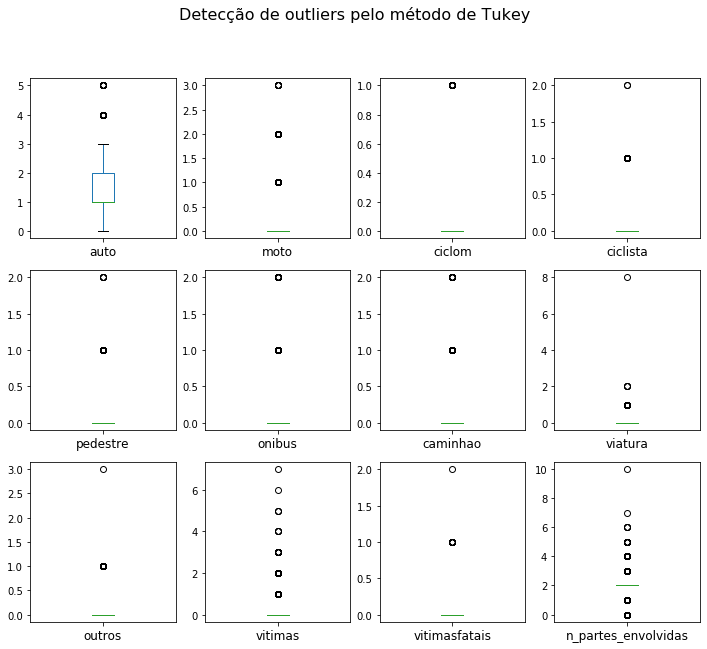

In [1691]:
# Visualizando outliers com o método de Tukey
cols=acidentes_rec.loc[:, "auto":"n_partes_envolvidas"].columns.tolist()
fig=plt.figure(figsize=(12,10))
fig.suptitle("Detecção de outliers pelo método de Tukey",fontsize=16)

for i in range(12):
    ax=fig.add_subplot(3,4,i+1)
    acidentes_rec[cols[i]].plot.box()
    plt.xticks(fontsize=12)

Como podemos ver no painel acima, todas variáveis quantitativas do nosso dataset possuem outliers.

Entretanto, esses outliers não parecem ser valores "errados" que foram incluídos no dataset. Por exemplo, a coluna `moto` 
possui um outlier com valor igual a 3. É perfeitamente possível haver um acidente envolvendo três motocicletas. Da mesma forma, a coluna `vitimas` possui um outlier com valor igual a 7. Também é perfeitamente possível haver um acidente envolvendo 7 vítimas.

Embora, aparamente, não haja necessidade de remover os outliers do nosso dataset, mesmo assim aplicaremos o método de Tukey para fins de aprendizado.

In [1692]:
# Removendo outliers a partir do método de Tukey
cols=acidentes_rec.loc[:,"auto":"n_partes_envolvidas"].columns.tolist()

for i in range(12):
    # Obtendo o primeiro quartil
    q1=acidentes_rec[cols[i]].quantile(q=0.25)
    # Obtendo o terceiro quartil
    q3=acidentes_rec[cols[i]].quantile(q=0.75)
    # Calculando o intervalo interquartil
    iqr=q3-q1
    acidentes_sem_outs_tuk=acidentes_rec[(acidentes_rec[cols[i]]>(q3+1.5*iqr)) | (acidentes_rec[cols[i]]<(q1-1.5*iqr))]
    
print("Número de linhas do dataset antes da limpeza de outliers por método de Tukey:",acidentes_rec.shape[0],"\n")
print("Número de linhas do dataset após a limpeza de outliers por método de Tukey:",acidentes_sem_outs_tuk.shape[0],"\n")
print("Total de linhas removidas:", acidentes_rec.shape[0]-acidentes_sem_outs_tuk.shape[0])

Número de linhas do dataset antes da limpeza de outliers por método de Tukey: 11225 

Número de linhas do dataset após a limpeza de outliers por método de Tukey: 1454 

Total de linhas removidas: 9771


Como podemos ver, foram removidas do dataset 9771 linhas que possuíam outliers. Note que o número  de linhas removidas pelo método de Tukey foi bem maior, quando comparado ao número de linhas removidas pelo método do z-score robusto. 

Entretanto, lembre-se que, no caso deste dataset, os outliers parecem valores plausíveis. Portanto, os manteremos quando formos realizar a análise exploratória de dados mais adiante.

## 2.5 Detecção de outliers 
### Análise bivariada

Também podemos detectar outliers analisando conjuntamente duas variáveis correlacionadas. Por exemplo, é de se esperar que quanto maior o número de partes envolvidas num acidente, maior será o número de vítimas do acidente. Dessa forma, espera-se que o número de partes envolvidas num acidente esteja positivamente correlacionada ao número de vítimas do acidente. Lembrando que definimos como "partes" veículos (qualquer tipo), ciclistas ou pedestres envolvidos nos acidentes.

Vamos aplicar uma análise bivariada para detecção de outliers entre as colunas `n_partes_envolvidas` e `vitimas`.

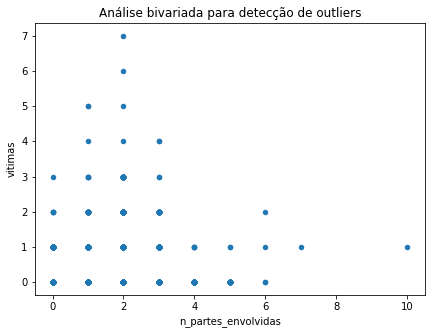

In [1693]:
acidentes_rec.plot.scatter(x="n_partes_envolvidas", y="vitimas",figsize=(7,5))
plt.title("Análise bivariada para detecção de outliers")
plt.show()


Como podemos ver acima, apesar de intuitivamente se esperar correlação entre o número de partes envolvidas em um acidente e o número de vítimas do acidente, nosso dataset não apresenta esta correlação. Portanto, utilizar uma análise bivariada para detecção de outliers nesta situação parece inadequada.

# 3 Estatística descritiva e visualização dos dados

Nesta parte do projeto focaremos em responder 5 perguntas referentes aos acidentes de trânsito em Recife no ano de 2018:
- Pergunta 1: Em quais horários ocorrem mais acidentes de trânsito na cidade de Recife?
- Pergunta 2: Em quais bairros do Recife acidentes de trânsito são mais communs?
- Pergunta 3: O número de acidentes de trânsito por bairro está correlacionado com o número de vítimas de trânsito por bairro?
- Pergunta 4: Quais tipos de acidentes causam maior número de vítimas fatais?
- Pergunta 5: Qual a média, a mediana e o desvio padrão do número de vítimas por tipo de acidente?

Ao responder estas perguntas, apresentaremos diferentes estatísticas descritivas, tais como medidas de tendência central (média, mediana e moda), medidas de dispersão (desvio padrão) e covariância.

## Pergunta 1: Em quais horários ocorrem mais acidentes de trânsito na cidade de Recife?


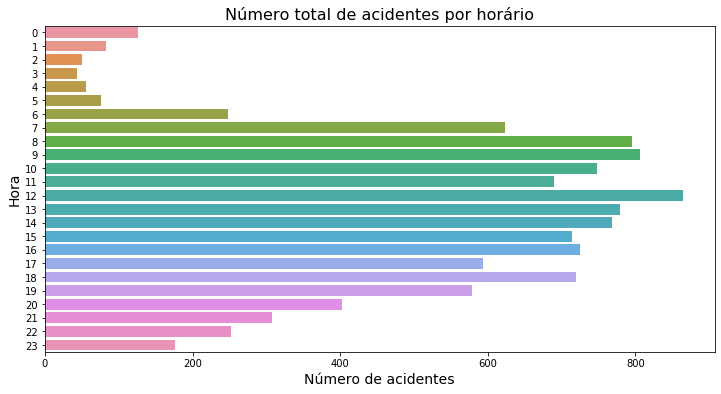

In [1694]:
# Número de acidentes por horário
horarios_acidentes=acidentes_rec.groupby(acidentes_rec.data_hora.dt.hour)["data_hora"].count()

plt.figure(figsize=(12,6))
sns.barplot(x=horarios_acidentes,y=horarios_acidentes.index,orient="h")
plt.title("Número total de acidentes por horário",fontsize=16)
plt.xlabel("Número de acidentes", fontsize=14)
plt.ylabel("Hora", fontsize=14)
plt.show()

Às 12h do dia foi o horário com maior número de acidentes em 2018, tendo ocorrido mais de 800 acidentes neste horário ao longo do ano. Entretanto, note que a quantidade de acidentes ao meio dia não é tão discrepante da quantidade de acidentes entre os horários das 8h às 18h. Esse padrão é esperado, uma vez que esses horários estão dentro do horário comercial, quando há maior fluxo de veículos nas ruas.

## Perguntas 2: Em quais bairros do Recife acidentes de trânsito são mais comuns?

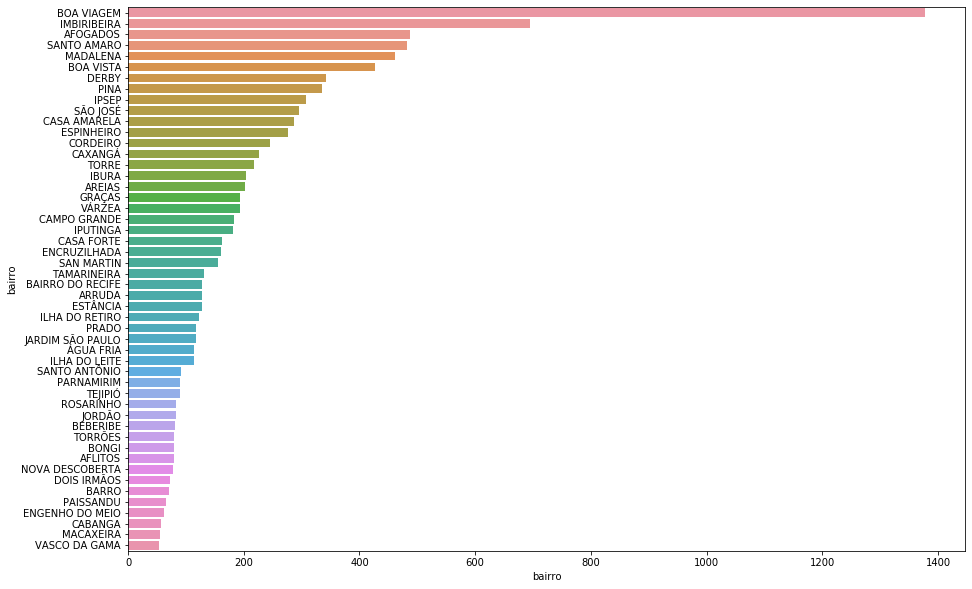

In [1695]:
# Número de acidentes de trânsito por bairro
bairros_acidentes=acidentes_rec.groupby(acidentes_rec.bairro)["bairro"].count().sort_values(ascending=False).head(50)
plt.figure(figsize=(15,10))
sns.barplot(x=bairros_acidentes,y=bairros_acidentes.index,orient="h")
plt.show()

Claramente o plot de barras acima mostra que Boa Viagem foi o bairro com maior número de acidentes de trânsito em 2018, com cerca de 1400 acidentes registrados. Note que a quantidade de acidentes de trânsito em Boa Viagem é cerca de duas vezes maior que o segundo colocado, o bairro da Imbiribeira. Uma possível explicação para Boa Viagem ser o bairro campeão em acidentes é o fato de ser uma bairro nobre e populoso, o que significa que há muitas pessoas com carros. 

## Pergunta 3: O número de acidentes de trânsito por bairro está correlacionado com o número de vítimas de trânsito por bairro?

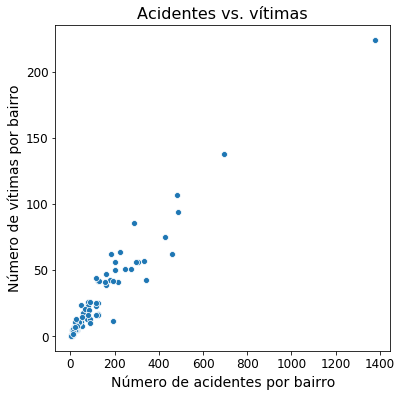

In [1696]:
# Caluclando o número de acidentes por bairro
acidentes_bairros=acidentes_rec.groupby(acidentes_rec.bairro)["bairro"].count()

# Calculando o número vítimas de acidentes por bairro
vitimas_bairros=acidentes_rec.groupby(acidentes_rec.bairro)["vitimas"].sum()
plt.figure(figsize=(6,6))
plt.title("Acidentes vs. vítimas",fontsize=16)
sns.scatterplot(x=acidentes_bairros,y=vitimas_bairros)
plt.xlabel("Número de acidentes por bairro",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Número de vítimas por bairro",fontsize=14)
plt.show()

In [1697]:
# Calculando a covariância entre o número de acidentes por bairro e o número de vítimas de trânsito de por bairro
acidentes_vitimas_bairros=pd.concat([acidentes_bairros,vitimas_bairros],axis=1)
print("Covariância entre número de acidentes e número de vítimas por bairro:\n",acidentes_vitimas_bairros.cov(),"\n")

# Testando a significância estatística da correlação entre o número de acidentes e número de vítimas por bairro
print("Teste de Pearson entre número de acidentes e número de vítimas por bairro:\n",acidentes_vitimas_bairros.corr(method="pearson"))

Covariância entre número de acidentes e número de vítimas por bairro:
                bairro      vitimas
bairro   34293.922787  5954.148135
vitimas   5954.148135  1117.447380 

Teste de Pearson entre número de acidentes e número de vítimas por bairro:
            bairro   vitimas
bairro   1.000000  0.961828
vitimas  0.961828  1.000000


Como esperado, o scatterplot revela que o número de acidentes por bairro está altamente correlacionado positivamente com número de vítimas de trânsito por bairro. 

Note também que a covariância e o coeficiente de correlação de Pearson confirmam a alta correlação revelada pelo scatter plot acima.

## Pergunta 4: Quais tipos de acidentes causam maior número de vítimas fatais?

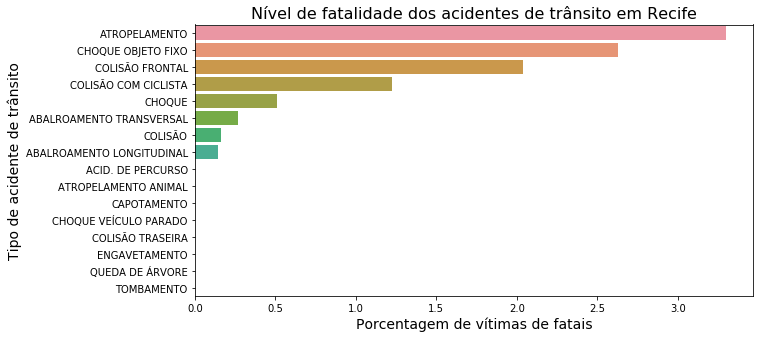

In [1698]:
# Porcetagem de vitimas fatais por tipo de acidente
vitimas_fatais_acidente=acidentes_rec.groupby(acidentes_rec.tipo)["vitimasfatais"].agg(["count","sum"])
vitimas_fatais_acidente["porcentagem_vf"]=(vitimas_fatais_acidente["sum"]/vitimas_fatais_acidente["count"])*100
vitimas_fatais_acidente=vitimas_fatais_acidente.sort_values(by="porcentagem_vf",ascending=False)
vitimas_fatais_acidente

plt.figure(figsize=(10,5))
plt.title("Nível de fatalidade dos acidentes de trânsito em Recife",fontsize=16)
sns.barplot(x=vitimas_fatais_acidente.porcentagem_vf,y=vitimas_fatais_acidente.index,orient="h")
plt.xlabel("Porcentagem de vítimas de fatais",fontsize=14)
plt.ylabel("Tipo de acidente de trânsito",fontsize=14)
plt.show()


Como podemos ver acima, felizmente, apenas uma pequena proporção dos acidentes de trânsito causam vítimas fatais. O tipo de acidente com maior fatalidade é atropelamento, com cerca de 3,5% dos episódios de atropelamento resultando em vítimas fatais.

O segundo tipo de acidente mais fatal é choque em objeto fixo, seguido de colisão frontal e colisão com ciclista. Para todas essas categorias a porcetagem de vítimas fatais está abaixo de 3%.

Note que 8 dos 16 tipos de acidentes registrados não resultaram em vítimas fatais.

## Pergunta 5: Qual a média, a mediana e o desvio padrão do número de vítimas por tipo de acidente?


In [1699]:
desv_pad_acidentes=acidentes_rec.groupby("tipo").agg(["mean","median","std"])["vitimas"]
desv_pad_acidentes=desv_pad_acidentes.sort_values(by="mean",ascending=False)
desv_pad_acidentes

,mean,median,std
tipo,,,
ATROPELAMENTO,1.051887,1.0,0.326036
COLISÃO COM CICLISTA,0.895706,1.0,0.516559
ACID. DE PERCURSO,0.807018,1.0,0.580597
TOMBAMENTO,0.666667,0.5,0.816497
CAPOTAMENTO,0.636364,0.5,0.789542
ATROPELAMENTO ANIMAL,0.571429,1.0,0.534522
COLISÃO FRONTAL,0.551020,0.0,1.137637
CHOQUE OBJETO FIXO,0.447368,0.0,1.082973
CHOQUE,0.306122,0.0,0.685501


Note que os valores das médias e das medianas são discrepantes em vários tipos de acidentes. Isso indica que o número de vítimas por tipo de acidente tem distribuição bastante heterogênea. 

Note também que existem categorias de acidentes que possuem alto desvio padrão enquanto outros tipos de acidentes possuem  baixo desvio padrão para o número de vítimas. Este fato revela que existem tipos acidentes que são mais prováveis de resultar em vítimas do que outros tipos de acidentes. Por exemplo, o desvio padrão de `COLISÃO FRONTAL` é 4 vezes maior que o desvio padrão de `ENGAVETAMENTO`. 

# 4 Conclusões

Neste projeto realizamos várias etapas de tratamento e limpeza de dados. Em seguida, realizamos uma análise exploratória dos dados e pudemos responder algumas perguntas acerca dos acidentes de trânsito que aconteceram no município de Recife no ano de 2018.

Dentre outras coisas, descobrimos que Boa Viagem foi o bairro que apresentou maior quatidade de acidentes. Também descobrimos que apenas uma pequena proporção dos acidentes resultaram em vítimas fatais, sendo atropelamento o tipo de acidente mais fatal, com ceca de 3,5% deles resultando em vítimas fatais.